# Классификация йогов с использованием машинного обучения
В этом ноутбуке проводится классификация йогов по позам с использованием моделей Random Forest и Logistic Regression.

### Загрузка необходимых библиотек
Импортируем необходимые библиотеки для работы с данными и машинным обучением.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

### Загрузка и исследование данных
Загружаем датасет и проводим базовый анализ данных, включая проверку на наличие пропусков.

In [2]:
df = pd.read_csv('yoga_TRAIN')
df.columns = range(len(df.iloc[0]))

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,417,418,419,420,421,422,423,424,425,426
0,1,0.96769,0.95594,0.94516,0.87896,0.86663,0.85866,0.85172,0.84579,0.84090,...,0.75879,0.81326,0.86449,0.89717,0.93158,0.96224,0.94772,0.98331,0.96656,0.96656
1,2,0.96092,0.92833,0.89653,0.86557,0.83554,0.80644,0.77847,0.75142,0.72531,...,1.25130,1.21390,1.21600,1.22380,1.20910,1.16900,1.12970,1.09100,1.05310,1.02980
2,2,1.90820,1.87050,1.83370,1.79780,1.76290,1.72910,1.69640,1.63020,1.55850,...,1.80560,1.86160,1.88460,1.92150,1.95580,1.96770,1.98210,1.98310,1.95300,1.96270
3,1,2.01670,1.98640,1.95650,1.92720,1.89880,1.87080,1.84360,1.81720,1.79120,...,1.77030,1.82520,1.88040,1.90540,1.93240,1.98900,2.02130,2.03550,2.00030,2.00030
4,1,0.85663,0.83063,0.84637,0.90310,0.93856,0.96055,0.98312,1.00630,1.02990,...,0.24107,0.28735,0.33374,0.39324,0.44643,0.50221,0.56688,0.63181,0.68752,0.68752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2,1.25460,1.21200,1.16980,1.12810,1.08730,1.04690,1.00720,0.96822,0.92978,...,1.31710,1.23380,1.15740,1.19260,1.24040,1.28730,1.29630,1.29700,1.29990,1.30040
295,2,0.78762,0.80932,0.83165,0.85467,0.87836,0.90269,0.92766,0.95325,0.97947,...,0.15363,0.21838,0.28294,0.33502,0.39637,0.46209,0.52818,0.57655,0.59491,0.60674
296,2,1.08610,1.04680,1.07730,1.10690,1.13280,1.15920,1.18620,1.21370,1.24170,...,0.37648,0.42645,0.48838,0.55665,0.62507,0.68253,0.72718,0.77848,0.84681,0.88943
297,2,1.52450,1.51770,1.51130,1.50530,1.49970,1.49460,1.49000,1.48580,1.48200,...,1.06860,1.10790,1.14700,1.17810,1.21310,1.25280,1.29180,1.32370,1.36010,1.38490


In [4]:
df.iloc[:,0].value_counts() / len(df)

0
2    0.545151
1    0.454849
Name: count, dtype: float64

Проверка разнообразия данных в целом

<Axes: >

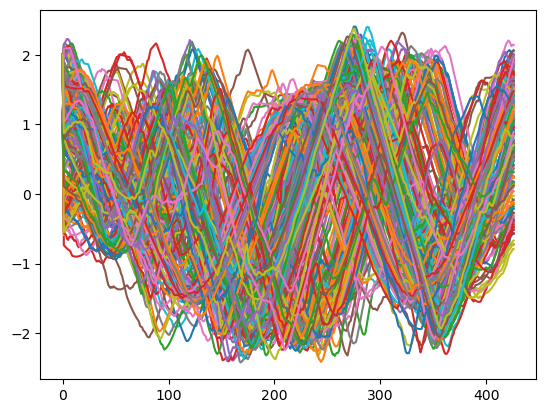

In [5]:
df.T.plot(legend=False)

Проверка разнообразия по классам

<Axes: >

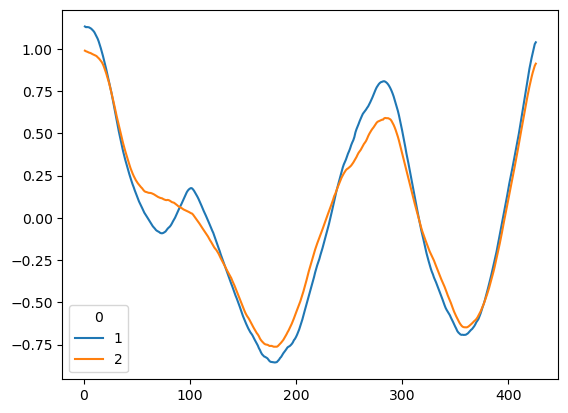

In [6]:
df.groupby(0).mean().T.plot()

### Построение моделей
В этой ячейке создаются модели случайного леса (Random Forest) и логистической регрессии (Logistic Regression).

In [7]:
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
rf.fit(df.iloc[:,1:], df.iloc[:,0])
lr.fit(df.iloc[:,1:], df.iloc[:,0])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

### Проверка качества модели
#### Загрузка тестовыз данных

In [8]:
df_test = pd.read_csv('yoga_test')

#### Создание предсказаний

In [9]:
y_pred_rf = rf.predict(df_test.iloc[:,1:])
y_pred_lr = lr.predict(df_test.iloc[:,1:])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### Оценка модели
На этом этапе проводится оценка моделей на тестовых данных с использованием метрики accuracy (точность).

In [10]:
accuracy_score(df_test.iloc[:,0], y_pred_rf), accuracy_score(df_test.iloc[:,0], y_pred_lr)

(0.8189396465488497, 0.6542180726908969)